In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
clusters = pd.read_csv("/home/jorge/tfm-jvm/data/data/clusters.csv")
data = pd.read_csv("/home/jorge/tfm-jvm/data/data/data_7.csv")
target_classic = pd.read_csv("/home/jorge/tfm-jvm/data/data/target_classic.csv")

In [4]:
data = data.merge(clusters, on="id_p")
data = data.merge(target_classic, on="id_p")
del data["id_p"], data["n_days"]

In [5]:
%%time
def get_race(x):
    if x[0] > x[1] and x[0] > x[2] and x[0] > x[3] and x[0] > x[4]:
        return "Romanos"
    elif x[1] > x[2] and x[1] > x[3] and x[1] > x[4]:
        return "Germanos"
    elif x[2] > x[3] and x[2] > x[4]:
        return "Galos"
    elif x[3] > x[4]:
        return "Egipcios"
    elif x[4] > x[1] and x[4] > x[2] and x[4] > x[3] and x[4] > x[0]:
        return "Hunos"
    else:
        return None
    
data["race"] = data[['romanos', 'germanos', 'galos', 'egipcios','hunos']].apply(get_race, axis=1)

CPU times: user 8.37 s, sys: 13.8 ms, total: 8.38 s
Wall time: 8.39 s


In [6]:
#Matplotlibs defines
plt.rcParams.update({'figure.autolayout': True})
plt.style.use('fivethirtyeight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


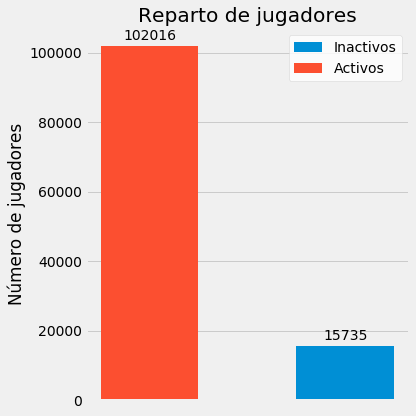

In [86]:
trues = len(data[data["inactive"] == True])
falses = len(data[data["inactive"] == False])
labels = ["Activos", "Inactivos"]

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
width = 0.05
fig, ax = plt.subplots(figsize=(6,6))
axx1 = ax.bar(0.5, trues, width, label="Inactivos")
axx2 = ax.bar(0.4, falses, width, label="Activos")
autolabel(axx1)
autolabel(axx2)

ax.xaxis.set_major_locator(plt.NullLocator())
ax.set_ylabel('Número de jugadores')
ax.set_title('Reparto de jugadores')
legend = ax.legend(frameon=True)
legend.get_frame().set_facecolor((1, 1, 1))
fig.savefig(fname="/home/jorge/tfm-jvm/memoria/oficial/figures/reparto_a_n.eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


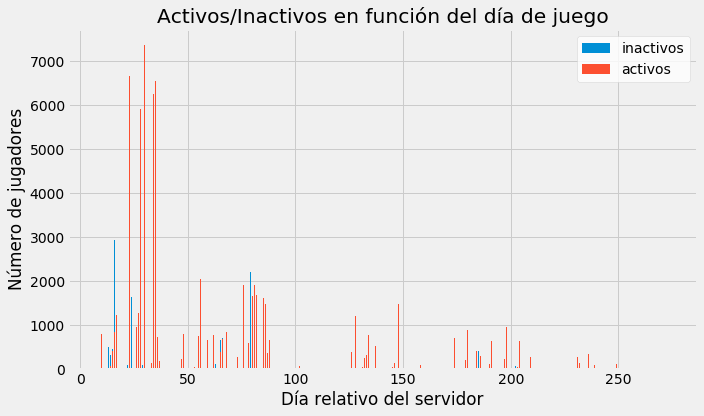

In [8]:
temp = data.groupby("rs_day_last")["inactive"].apply(lambda x: x[x==True].count())
days = temp.index.tolist()
trues = temp.values.tolist()
falses = data.groupby("rs_day_last")["inactive"].apply(lambda x: x[x==False].count()).values.tolist()


x = np.arange(len(days))
width = 0.4
fig, ax = plt.subplots(figsize=(10,6))
#ax.bar(x- width/2, trues, width = 0.35, label="inactivos")
#ax.bar(x+ width/2, falses, width = 0.35, label="activos")
ax.bar(days, trues, width = 0.35, label="inactivos")
ax.bar(days, falses, width = 0.35, label="activos")
ax.set_ylabel('Número de jugadores')
ax.set_xlabel('Día relativo del servidor')
ax.set_title('Activos/Inactivos en función del día de juego')
legend = ax.legend(frameon=True)
legend.get_frame().set_facecolor((1, 1, 1))
fig.savefig(fname="/home/jorge/tfm-jvm/memoria/oficial/figures/rs_inactive_active.eps")

In [107]:
race[race != None].value_counts()

Romanos     46591
Galos       42889
Germanos    23953
Egipcios     3277
Hunos        1041
dtype: int64

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


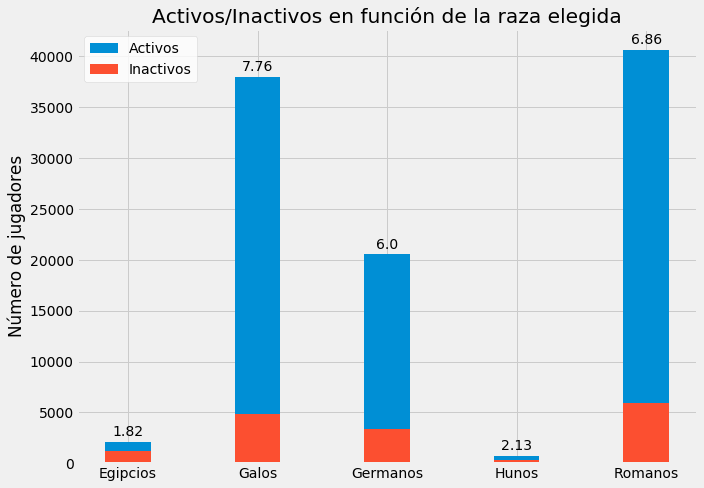

In [145]:
labels = ['Egipcios', 'Galos', 'Germanos', 'Hunos', 'Romanos']
ri = data.groupby(by=["race", "inactive"])["N_last"].count().reset_index().sort_values(by="inactive")["N_last"].values.tolist()
ri_a = ri[:5]
ri_n = ri[5:]
prop = []
for i in range(len(ri_n)):
    prop.append(round(ri_a[i]/ri_n[i], 2))

width = 0.35 


def autolabel(rects):
    i = 0
    for rect in rects:
        
        height = rect.get_height()
        ax.annotate('{}'.format(prop[i]),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        i += 1

fig, ax = plt.subplots(figsize=(10,7))
axx = ax.bar(labels, ri_a, width, label='Activos')
ax.bar(labels, ri_n, width, label='Inactivos')

ax.set_ylabel('Número de jugadores')
ax.set_title('Activos/Inactivos en función de la raza elegida')
legend = ax.legend(frameon=True)
legend.get_frame().set_facecolor((1, 1, 1))
autolabel(axx)
fig.savefig(fname="/home/jorge/tfm-jvm/memoria/oficial/figures/race_inactive.eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


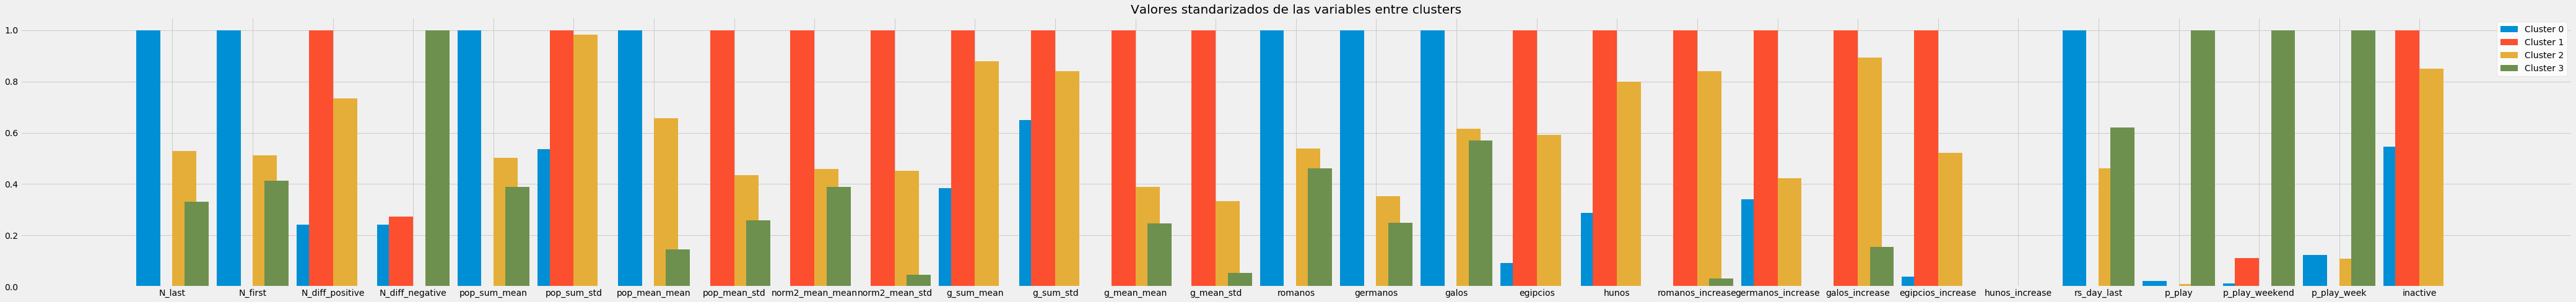

In [52]:
labels = data.columns.to_list()
labels.remove("cluster")
labels.remove("race")
temp = data.groupby(by="cluster").mean()
temp = (temp-temp.min())/(temp.max()-temp.min())
temp = temp.values.tolist()

x = np.arange(len(labels))
width = 0.3 

fig, ax = plt.subplots(figsize=(58,7))
ax.bar(x - width, temp[0], width, label='Cluster 0')
ax.bar(x - width/2, temp[1], width, label='Cluster 1')
ax.bar(x + width/2, temp[2], width, label='Cluster 2')
ax.bar(x + width, temp[3], width, label='Cluster 3')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_title('Valores standarizados de las variables entre clusters')
legend = ax.legend(frameon=True)
legend.get_frame().set_facecolor((1, 1, 1))
fig.savefig(fname="/home/jorge/tfm-jvm/memoria/oficial/figures/cluster_diffs_total.eps")

In [49]:
data.groupby(by="cluster").mean().describe()

,N_last,N_first,N_diff_positive,N_diff_negative,pop_sum_mean,pop_sum_std,pop_mean_mean,pop_mean_std,norm2_mean_mean,norm2_mean_std,...,romanos_increase,germanos_increase,galos_increase,egipcios_increase,hunos_increase,rs_day_last,p_play,p_play_weekend,p_play_week,inactive
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.0,4.000000,4.000000,4.000000,4.000000,4.000000
mean,5.142631,4.751448,0.678719,-0.204117,2719.592474,180.714053,419.523301,29.690016,104.441067,1.858720,...,0.157030,0.075855,0.106360,0.037638,0.0,64.968135,0.749932,0.760448,0.745658,0.133332
std,0.378177,0.416977,0.074720,0.012880,267.903882,13.501737,19.771462,2.009721,5.796059,0.264820,...,0.017022,0.008392,0.008110,0.018795,0.0,5.272220,0.008554,0.013977,0.006447,0.020616
min,4.722354,4.262991,0.597558,-0.215430,2412.462418,162.678463,400.261274,27.681921,97.935240,1.644758,...,0.141899,0.066957,0.098175,0.022087,0.0,58.336467,0.745470,0.752296,0.741380,0.105373
25%,4.946447,4.576695,0.627468,-0.210007,2601.809663,174.202447,404.910422,28.601106,102.044773,1.664581,...,0.142662,0.072110,0.100041,0.023221,0.0,62.752049,0.745594,0.752592,0.742522,0.124493
50%,5.110730,4.732498,0.677724,-0.207724,2701.659214,184.437397,417.388569,29.327604,103.905789,1.787192,...,0.155982,0.074651,0.106552,0.033232,0.0,65.233029,0.745749,0.754097,0.742997,0.137958
75%,5.306914,4.907250,0.728975,-0.201833,2819.442025,190.949002,432.001448,30.416514,106.302083,1.981332,...,0.170349,0.078396,0.112871,0.047649,0.0,67.449115,0.750087,0.761954,0.746133,0.146797
max,5.626711,5.277804,0.761870,-0.185590,3062.589049,191.302954,443.054792,32.422933,112.017451,2.215739,...,0.174256,0.087162,0.114163,0.062000,0.0,71.070013,0.762760,0.781304,0.755260,0.152039


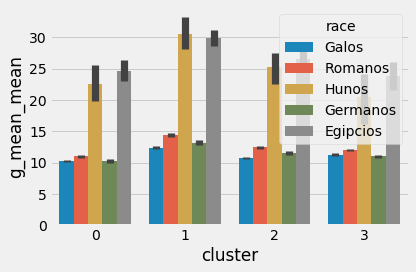

In [25]:
sns.barplot(x="cluster", y="g_mean_mean", hue="race", data=data)

In [100]:
temp = data[data["inactive"] == False].groupby("rs_day_last")["g_mean_mean"].mean()
days = temp.index.tolist()
mean = temp.values.tolist()
